# Exploratory Data Analysis

In [15]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /Users/carol/Documents/workshop01


In [16]:
from src.db_connection import build_engine
from src.model import Candidates
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
engine = build_engine()

Successfully connected to the database workshop1!


In [18]:
Session = sessionmaker(bind=engine)
session = Session()

In [19]:
base = declarative_base()
table = aliased(Candidates)

In [26]:
query = session.query(table).statement
df = pd.read_sql(query, engine)

In [9]:
df.shape

(50000, 11)

In [10]:
df.columns

Index(['ID', 'First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code_Challenge_Score',
       'Technical_Interview_Score'],
      dtype='object')

In [39]:
df.head()

,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


In [38]:
df['Hired'] = ((df['Code_Challenge_Score'] >=7) & (df['Technical_Interview_Score'] >=7)).astype(int)

In [37]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data missing

In [55]:
missing_data = df.isna().sum()
missing_data

ID                           0
First_Name                   0
Last_Name                    0
Email                        0
Application_Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code_Challenge_Score         0
Technical_Interview_Score    0
dtype: int64

## Data type

In [50]:
# categorical veriables
categorical_variables=[i for i in df.columns if df[i].dtypes=='O']
print(f'\nDataset having {len(categorical_variables)} categorical variables')
print('--'*39)
print(categorical_variables)


# numerical varibles
numerical_variables=[i for i in df.columns if df[i].dtypes!='O']
print(f'\nDataset having {len(numerical_variables)} numerical variables.')
print('--'*39)
print(numerical_variables)


Dataset having 7 categorical variables
------------------------------------------------------------------------------
['First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country', 'Seniority', 'Technology']

Dataset having 4 numerical variables.
------------------------------------------------------------------------------
['ID', 'YOE', 'Code_Challenge_Score', 'Technical_Interview_Score']


## Data Distribution

# Outliers

In [28]:
df = df.drop(columns=['ID'])

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YOE,50000.0,15.28698,8.830652,0.0,8.0,15.0,23.0,30.0
Code_Challenge_Score,50000.0,4.99640,3.166896,0.0,2.0,5.0,8.0,10.0
Technical_Interview_Score,50000.0,5.00388,3.165082,0.0,2.0,5.0,8.0,10.0


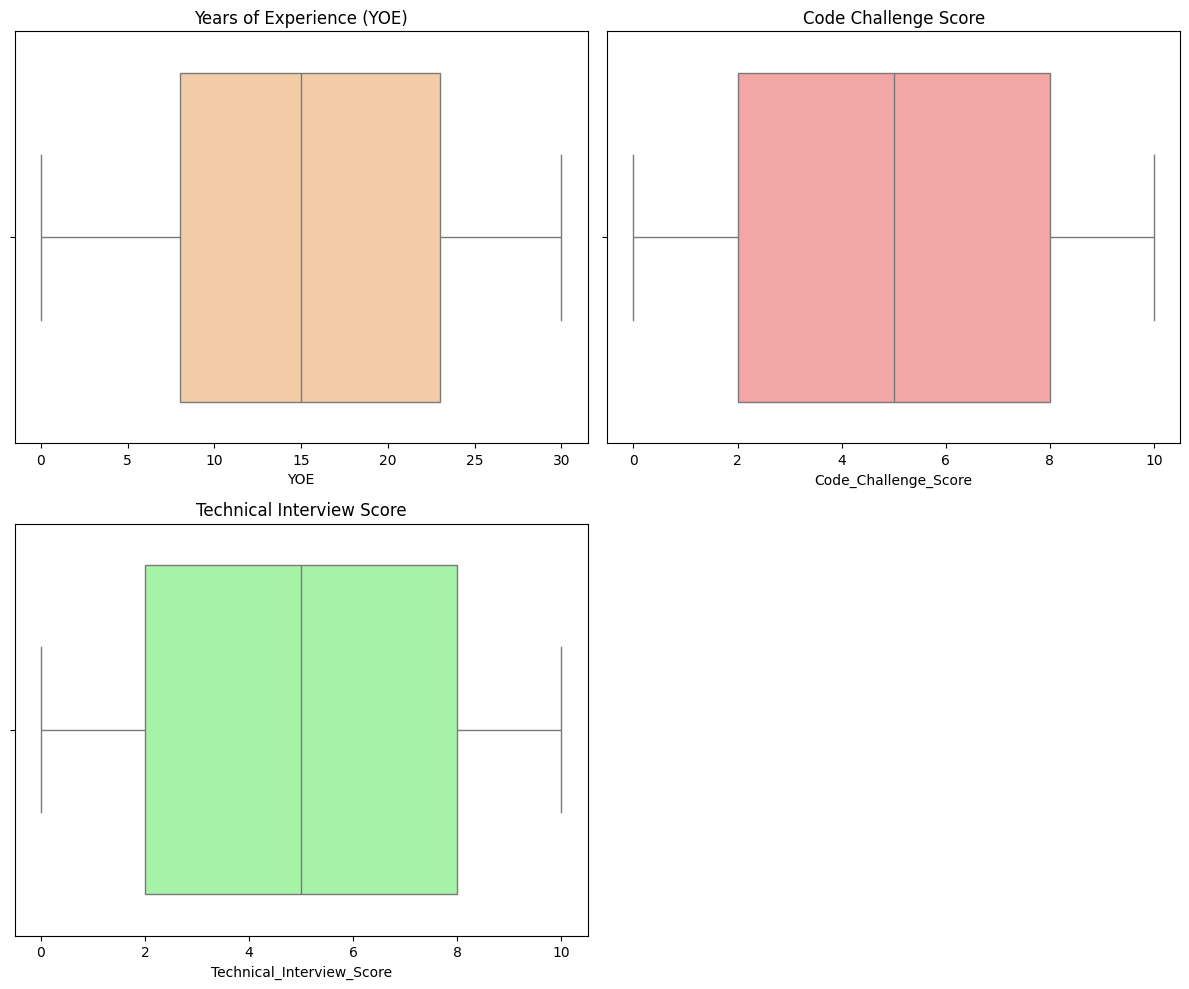

In [33]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.boxplot(ax=axes[0, 0], x=df["YOE"], color='#FFCC99')
axes[0, 0].set_title('Years of Experience (YOE)')

sns.boxplot(ax=axes[0, 1], x=df["Code_Challenge_Score"], color='#FF9999')
axes[0, 1].set_title('Code Challenge Score')

sns.boxplot(ax=axes[1, 0], x=df["Technical_Interview_Score"], color='#99FF99')
axes[1, 0].set_title('Technical Interview Score')

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

## Data Correlation

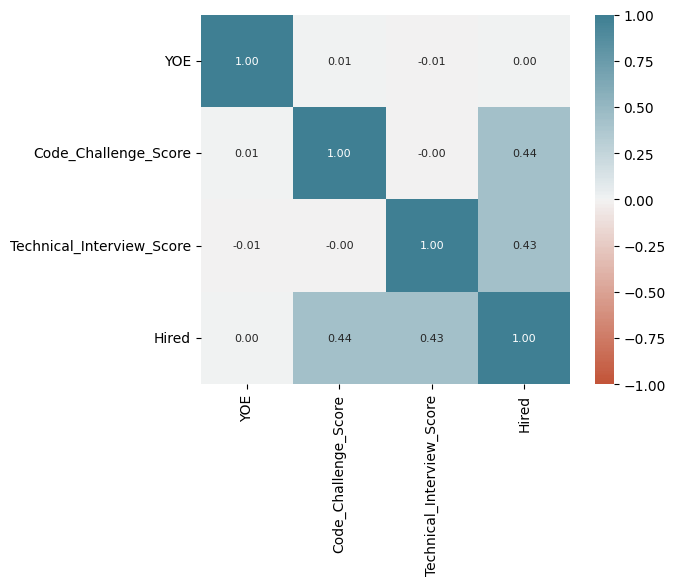

In [31]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

# Data Patterns

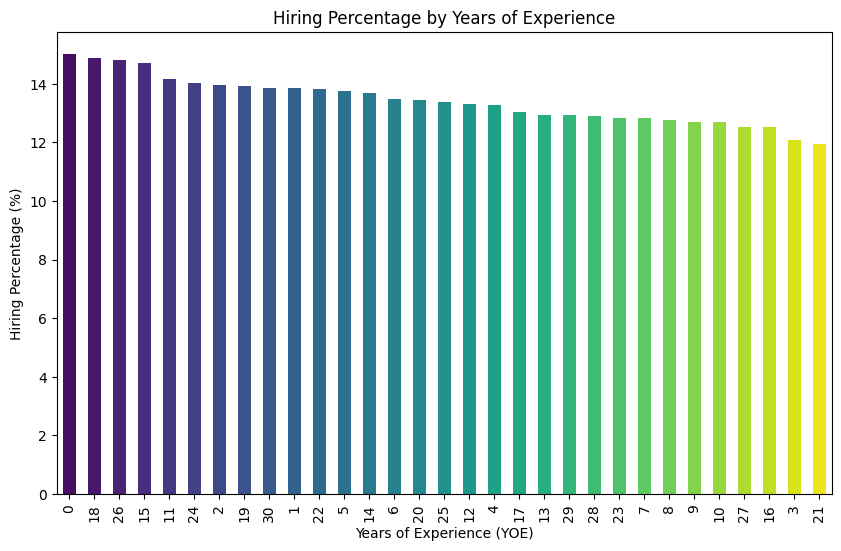

In [44]:
temp = df.groupby('YOE').Hired.mean().sort_values(ascending = False) * 100

palette = sns.color_palette("viridis", len(temp)) 
temp.plot.bar(color=palette, figsize=(10, 6))

plt.title('Hiring Percentage by Years of Experience')
plt.xlabel('Years of Experience (YOE)')
plt.ylabel('Hiring Percentage (%)')

plt.show()